<a href="https://colab.research.google.com/github/keeratkaur/CustomerSegmentation/blob/main/CustomerSegementationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing kaggle library
! pip install kaggle

In [3]:
# Configure the path of kaggle file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [7]:
#API to fetch the dataset from kaggle
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.25MB/s]


In [9]:
#Extracting the compressed dataset

from zipfile import ZipFile
dataset='/content/customer-segmentation-tutorial-in-python.zip'

with ZipFile(dataset,'r') as zip: #read this data file as read
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.isnull().sum()
df.dropna(inplace=True)


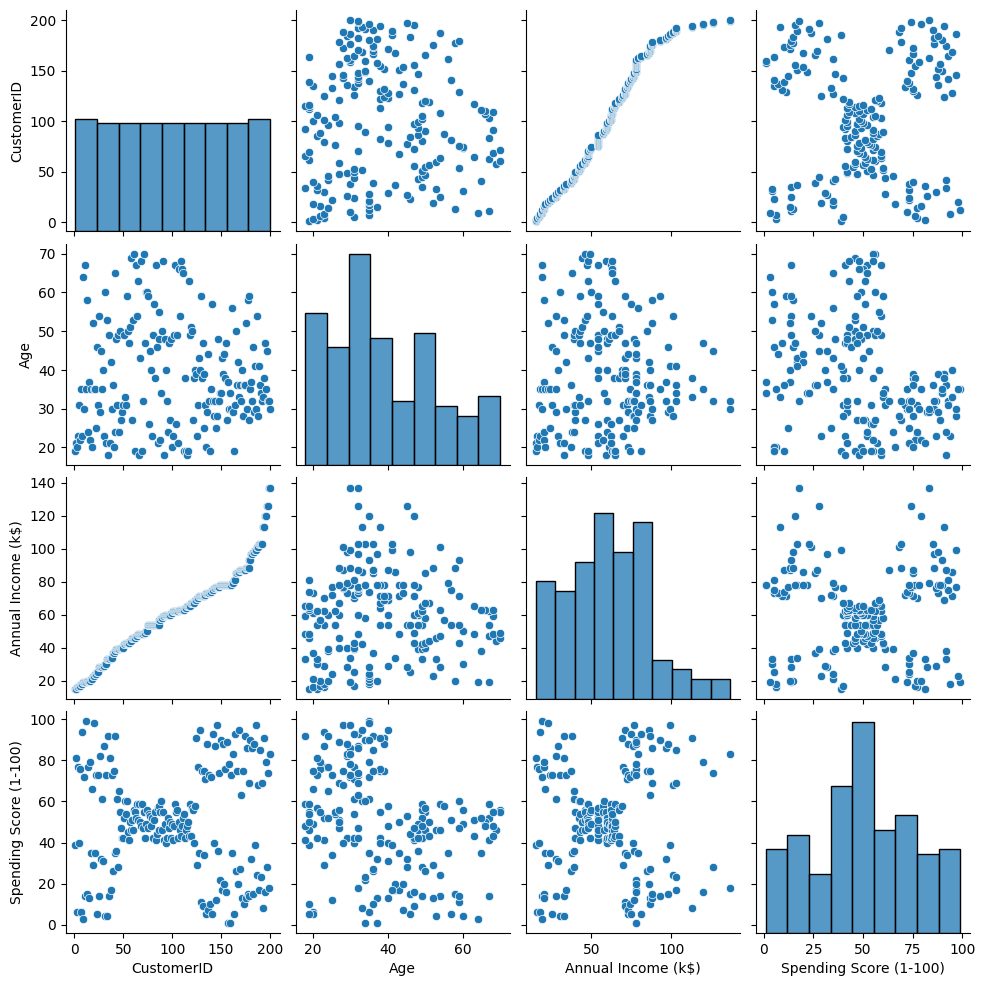

In [13]:
sns.pairplot(df)
plt.show()


In [14]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


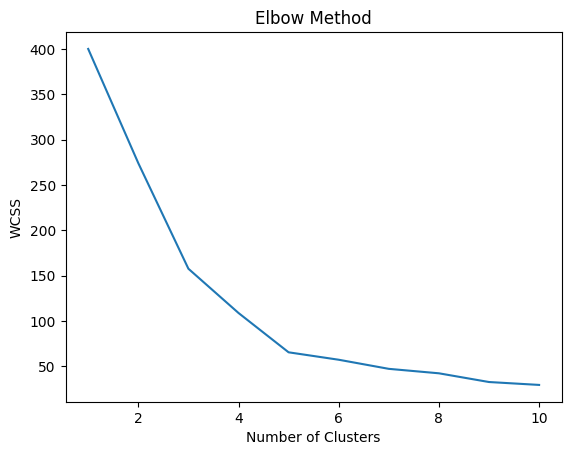

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
#KMEANS CLUSTERING
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster assignments to the original dataframe
df['Cluster'] = clusters


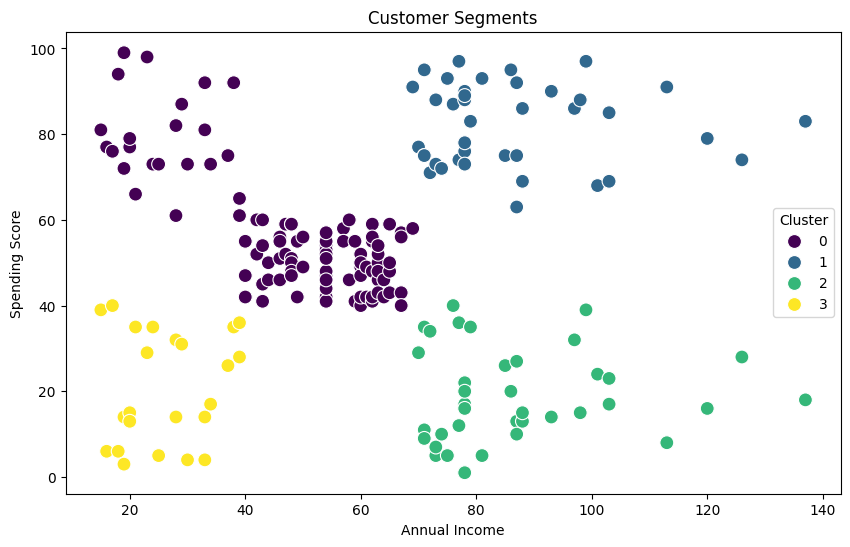

In [21]:
#Plotting clusters to see segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [23]:
# Filter out non-numeric columns for summary statistics
numeric_df = df.select_dtypes(include=[np.number])
cluster_summary = numeric_df.groupby(df['Cluster']).mean()
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0             70.97  39.200000           48.260000               56.480000   
1            162.00  32.692308           86.538462               82.128205   
2            162.00  40.394737           87.000000               18.631579   
3             23.00  45.217391           26.304348               20.913043   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  


In [24]:
# Encode 'Gender' as numeric values (optional, if needed)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Change values based on your data
# Now, proceed with clustering summary as usual
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0             70.97  0.590000  39.200000           48.260000   
1            162.00  0.538462  32.692308           86.538462   
2            162.00  0.473684  40.394737           87.000000   
3             23.00  0.608696  45.217391           26.304348   

         Spending Score (1-100)  
Cluster                          
0                     56.480000  
1                     82.128205  
2                     18.631579  
3                     20.913043  
